In [1]:
import sys
sys.path.append('../')

import networkx as nx

In [2]:
import sys
sys.path.append('../')

import networkx as nx

In [3]:
from modules.load_molecules import LoadMolecule
from modules.molecular_graph import MolecularGraph
from modules.conflict_graph import ConflictGraph
from solve_qubo import SolveQUBO
from modules.reporting import Report

### Instantiate mol loader

In [4]:
path_terpenoids = '../data/terpenoids'
loader = LoadMolecule(path_terpenoids)

77 molecules available in ../data/terpenoids


You can now load all molecules listed in `loader.available_molecules`.

For instance, let's load menthol.

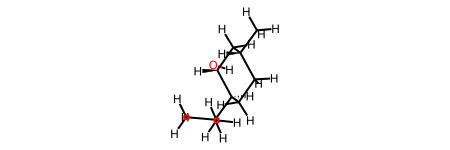

In [5]:
menthol = loader.load('menthol_bs_biblio_ob')
menthol

From this, we can directly create the corresponding molecular graph. To reduce its size and decrease the number of needed qubits, we will use the collapse rings approximation.

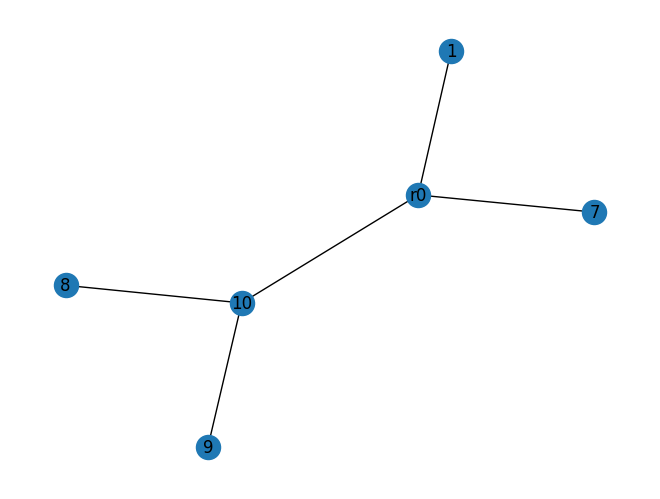

In [6]:
collapse_rings = True
menthol_graph = MolecularGraph(menthol,mol_name='menthol_bs_biblio_ob',collapse_rings=collapse_rings)
nx.draw(menthol_graph.mol_graph,with_labels=True)

Let's pick another molecule, generate its molecular graph and finally build the conflict graph associated with the 2 molecules

In [7]:
mol = loader.load('CID_335_o-cresol')
mol_graph = MolecularGraph(mol,mol_name='CID_335_o-cresol',collapse_rings=collapse_rings)

In [8]:
conflict_g = ConflictGraph(menthol_graph,mol_graph)

In [9]:
n_layers = 2
factor = 2
solver_type = 'QUBOSolverCPU'
solver = SolveQUBO(conflict_g=conflict_g,solver_type=solver_type,factor=float(factor))

In [10]:
solution = solver.solve_qubo()

COLOR SCHEME:
Colored nodes are part of the largest common substructure between molecules.
Nodes with the same color are matching nodes in the solution being plotted.
WHITE nodes are NOT part of the largest commom substructure.


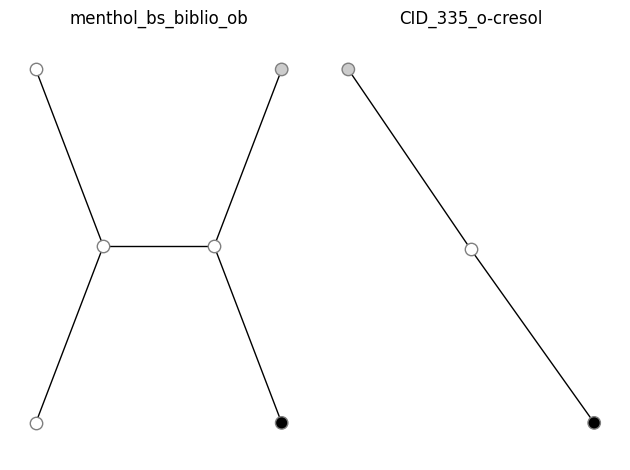

Similarity size: 0.5000 | Similarity features: 0.2039
There are 0 conflicts in the solution


In [16]:
reporting = Report.from_conflict_graph(conflict_g,solution=solution.configuration)
reporting.full_report(delta=0.5)